In [17]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import nltk
import numpy as np

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
path = '/kaggle/input/resume-dataset/Resume/Resume.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(2484, 4)


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [19]:
#printing the dataset string example
df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [20]:
#printing the resume html example
df['Resume_html'][0]


'<div class="fontsize fontface vmargins hmargins linespacing pagesize" id="document"> <div class="section firstsection" id="SECTION_NAME500375979" style="\n      padding-top:0px;\n    "> <div class="paragraph PARAGRAPH_NAME firstparagraph" id="PARAGRAPH_500375979_1_326506904" style="\n      padding-top:0px;\n    "> <div class="name" itemprop="name"> <span class="field fName" id="500375979FNAM1"> </span> <span> </span> <span class="field" id="500375979LNAM1"> HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR</span> </div> </div> </div> <div class="section" id="SECTION_SUMM500375981" style="\n      padding-top:0px;\n    "> <div class="heading bottomborder"> <div class="sectiontitle" id="SECTNAME_SUMM500375981"> Summary</div> </div> <div class="paragraph firstparagraph" id="PARAGRAPH_500375981_1_326506917" style="\n      padding-top:0px;\n    "> <div class="field singlecolumn" id="500375981FRFM1"> <p align="LEFT"> Dedicated Customer Service Manager with 15+ years of experience in H

In [21]:
STEMMER = nltk.stem.porter.PorterStemmer()

In [22]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    # stemming
    txt = [STEMMER.stem(w) for w in txt]

    return ' '.join(txt)

In [23]:
df['Resume'] = df['Resume_str'].apply(lambda w: preprocess(w))
# drop original text column
df.pop('Resume_str')
df

,ID,Resume_html,Category,Resume
0,16852973,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administr market associ hr administr summar...
1,22323967,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr oper summari versatil medi...
2,33176873,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summari year experi recruit plu ye...
3,27018550,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summari dedic driven dynam year ...
4,17812897,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manag skill highlight hr skill hr depart st...
...,...,...,...,...
2479,99416532,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgt e non commiss offic charg brigad mail...
2480,24589765,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,govern relat commun organiz develop director p...
2481,31605080,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent profession profil support spe...
2482,21190805,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director offic manag summari highli pe...


In [24]:
df['Category'].describe()

count                       2484
unique                        24
top       INFORMATION-TECHNOLOGY
freq                         120
Name: Category, dtype: object

In [25]:
#getting the count of values in list format

freq = Counter(df['Category'])
cat = []
count = []
for key in freq.keys():
  cat.append(key)
  count.append(freq[key])
df['Category'].value_counts()


INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

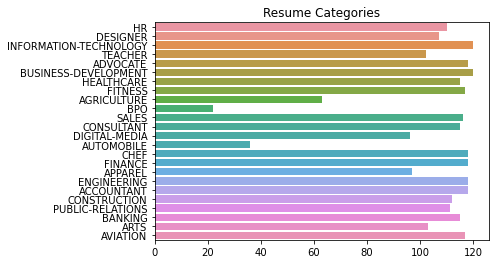

<Figure size 1440x720 with 0 Axes>

In [26]:
sns.barplot(x=count,y=cat, orient = 'h')
plt.title("Resume Categories")
plt.figure(figsize=(20, 10),)
plt.show()

In [27]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [28]:
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories[9]

,Resume,Category
557,busi develop summari result driven highli skil...,BUSINESS-DEVELOPMENT
558,busi develop execut profil year demonstr oper ...,BUSINESS-DEVELOPMENT
559,busi develop profession summari seek meaning p...,BUSINESS-DEVELOPMENT
560,busi develop career overview detail orient pro...,BUSINESS-DEVELOPMENT
561,busi develop career overview commit motiv prof...,BUSINESS-DEVELOPMENT
...,...,...
672,busi develop intern summari obtain posit analy...,BUSINESS-DEVELOPMENT
673,director busi develop execut profil passion sa...,BUSINESS-DEVELOPMENT
674,busi develop manag summari extens divers sale ...,BUSINESS-DEVELOPMENT
675,busi develop repres profession summari experie...,BUSINESS-DEVELOPMENT


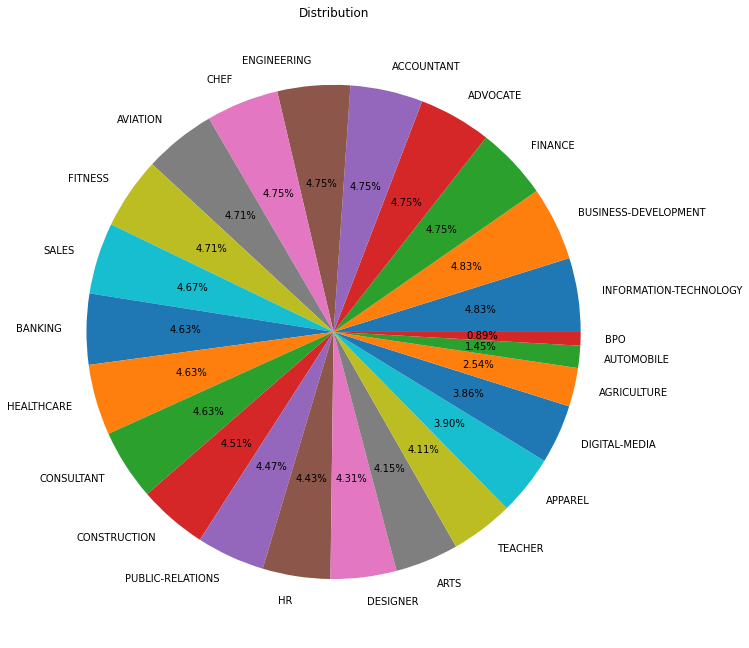

In [29]:
from matplotlib.gridspec import GridSpec
count=df['Category'].value_counts()
label=df['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

pie=plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [32]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

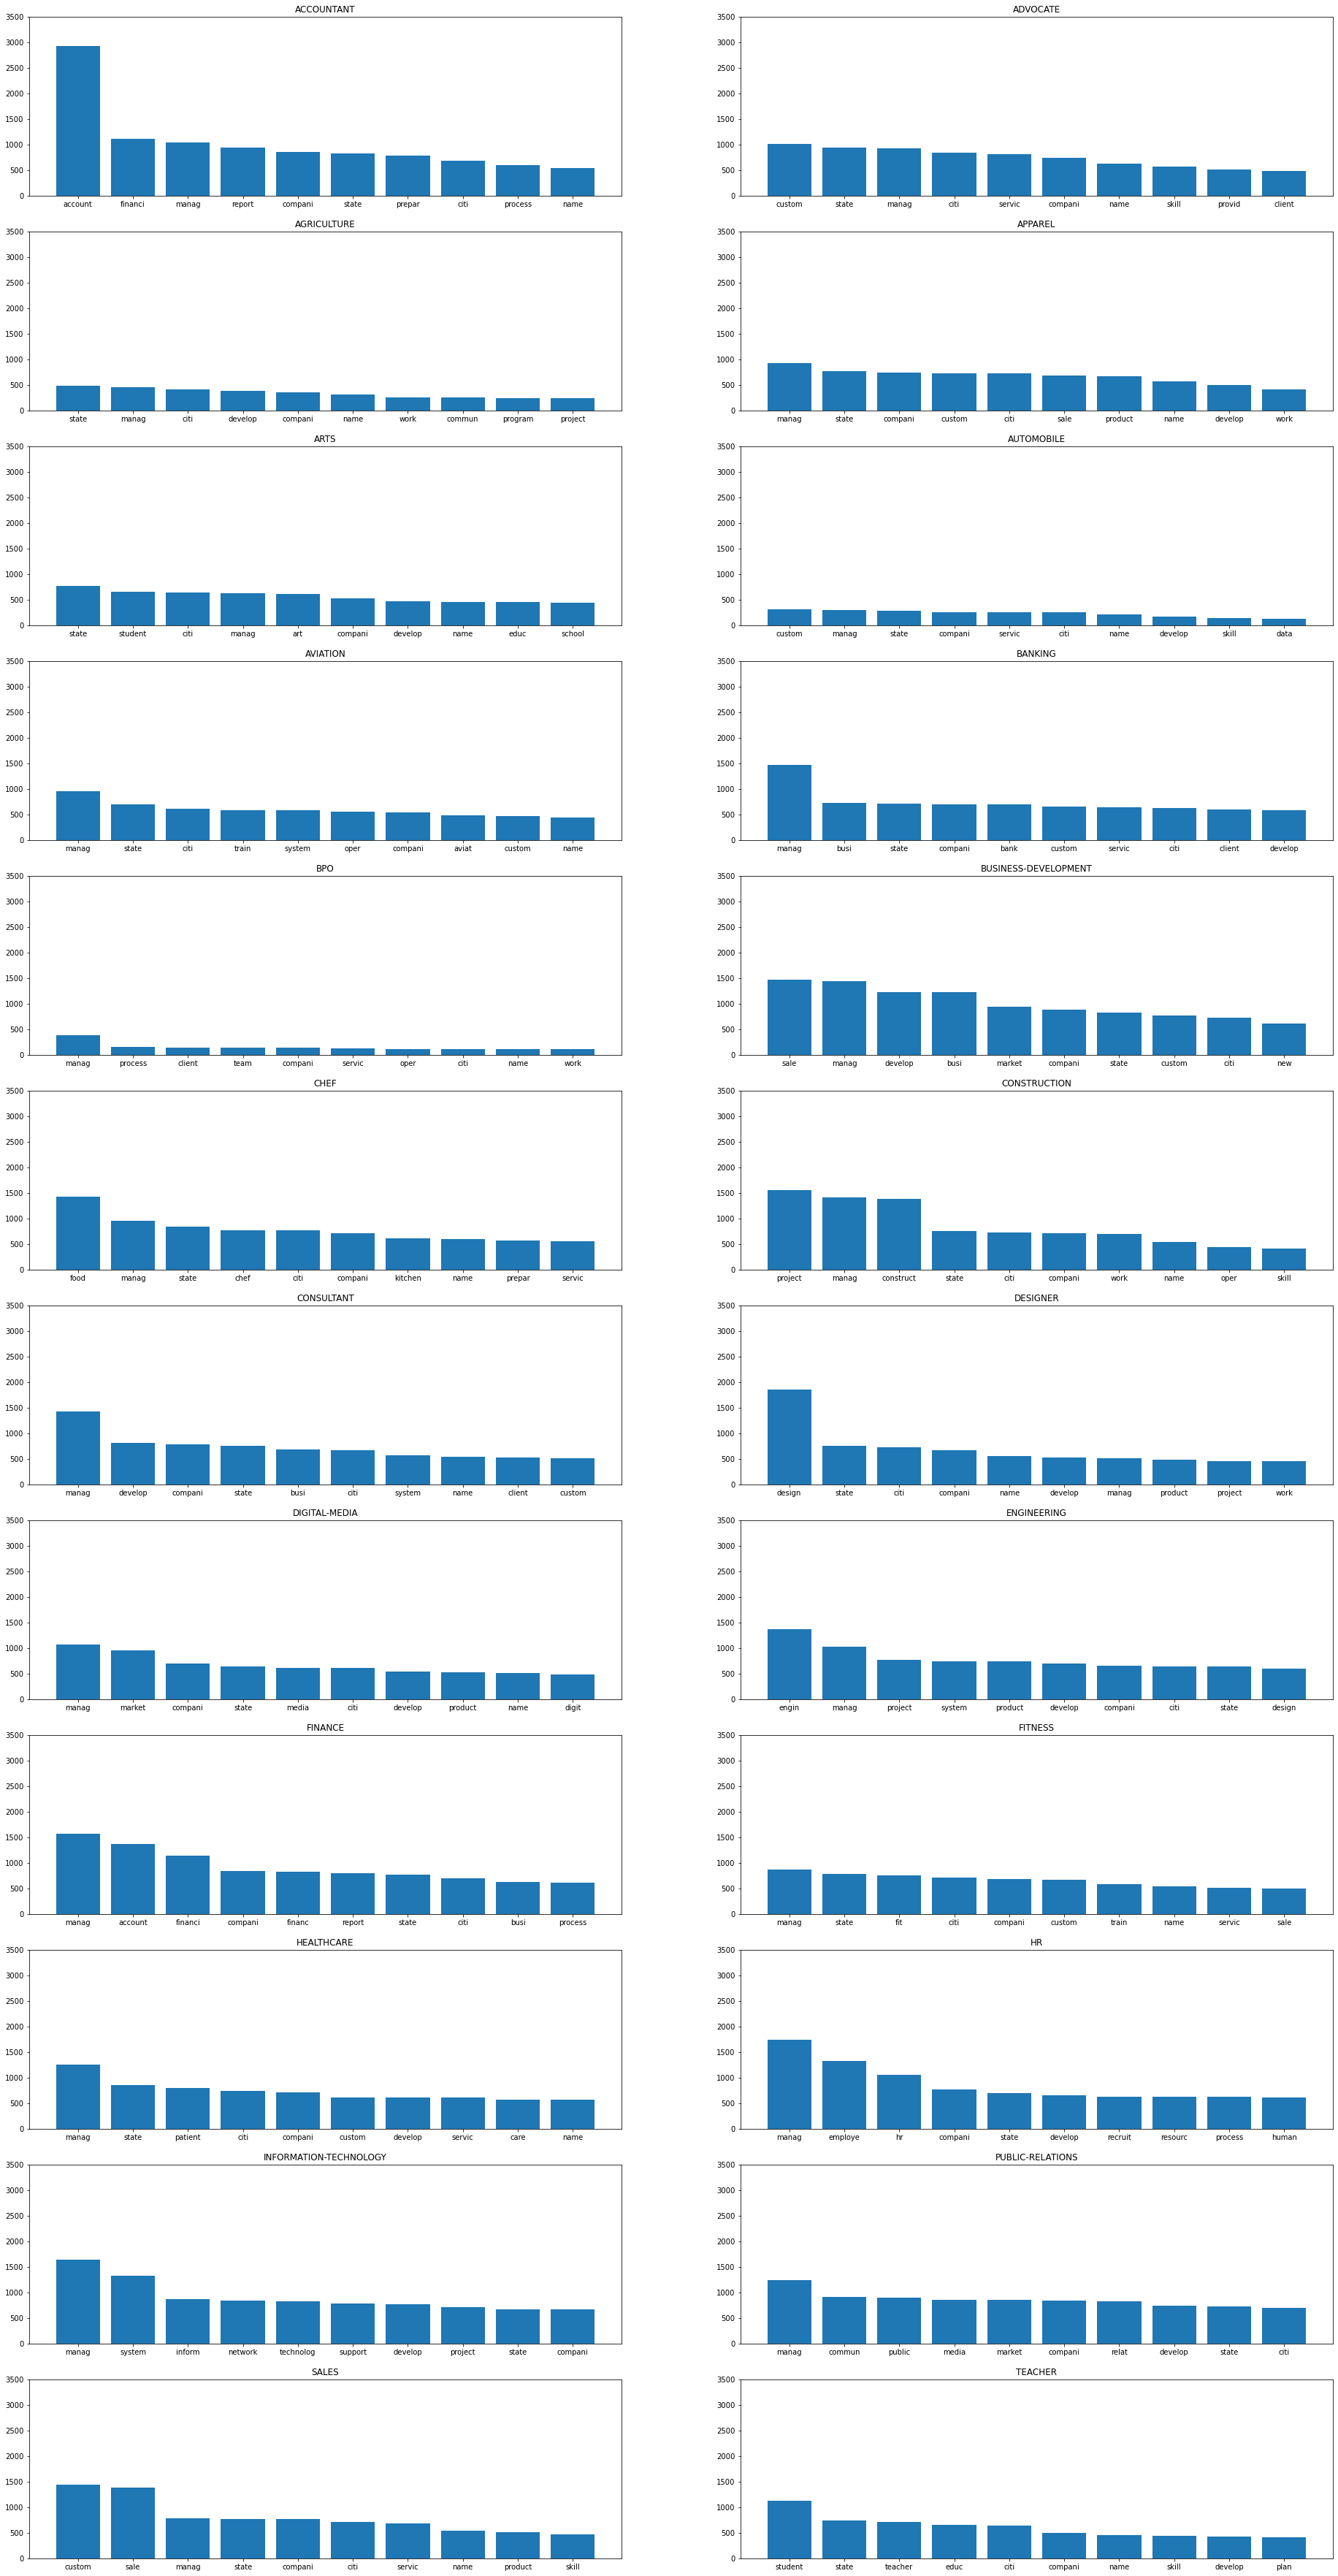

In [33]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(np.sort(df['Category'].unique())):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(12, 2, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()